# 1 Business Understanding
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## 1.1 Objectives
### 1.1.1 Main Objective
To determine which types of films are currently performing best at the box office to guide the new movie studio's content strategy.

### 1.1.2 Specific Objectives

1. To identify which genres generate the highest revenue and ROI.

2. To evaluate what is the optimal budget range for profitable movies.

3. To assess whether release timing (month/season) impact success.

4. To determine if movie ratings (IMDB, Rotten Tomatoes) correlate with box office performance.

5. To investigate if certain studios/directors consistently producing high-grossing films.

## 1.2 Defining the Metric for Success
The success of this project will be measured by the ability to provide data-driven and actionable insights that help the company’s new movie studio make informed decisions about the types of films to produce

# 2. Data Understanding
To help the company make smart decisions about what kinds of movies to create, I pulled data from several trusted movie industry sources. These include:

Box Office Mojo – shows how much money movies made in theaters (mainly in the U.S.).

The Numbers – includes production budgets and both domestic and worldwide earnings.

TMDb – provides metadata like genres, ratings, popularity, and runtime.

Rotten Tomatoes – contains critic and audience scores, content ratings, and genres.

IMDb (via SQL) – offers additional details like directors, start years, and user rating

# 3. Data Preparation and Cleaning

## 3.1 Data Loading

Import pandas, numpy, sqlite3, zipfile, matplotlib and seaborn libraries, then load the dataset in csv and database format using pandas.

In [1]:
# Import liblaries 
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import zipfile

%matplotlib inline

In [2]:
# Load CSV/TSV files
box_office_mojo = pd.read_csv('bom.movie_gross.csv.gz')
the_numbers = pd.read_csv('tn.movie_budgets.csv.gz')
rt_movies = pd.read_csv('rt.movie_info.tsv.gz', sep='\t')
rt_reviews = pd.read_csv('rt.reviews.tsv.gz', sep='\t', encoding='latin-1')
tmdb_movies = pd.read_csv('tmdb.movies.csv.gz')

In [3]:
# Extract the database from the zip file
zip_file_path = 'im.db.zip'
extracted_db_path = './im.db' # Extract to the current directory

# Connect to the extracted SQLite database
conn = sqlite3.connect(extracted_db_path)

## 3.2 Data Exploration

In [4]:
# Explore available tables in IMDB database
imdb_tables = pd.read_sql("""
SELECT name
FROM sqlite_master
WHERE type='table';
""", conn)

print(imdb_tables)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [5]:
# Read the entire 'directors' table from the connected SQLite database into a DataFrame called q
q = pd.read_sql("""
SELECT *
FROM directors
""", conn)
# Print the contents of the DataFrame 'q' 
print(q, conn)

         movie_id   person_id
0       tt0285252   nm0899854
1       tt0462036   nm1940585
2       tt0835418   nm0151540
3       tt0835418   nm0151540
4       tt0878654   nm0089502
...           ...         ...
291169  tt8999974  nm10122357
291170  tt9001390   nm6711477
291171  tt9001494  nm10123242
291172  tt9001494  nm10123248
291173  tt9004986   nm4993825

[291174 rows x 2 columns] <sqlite3.Connection object at 0x000001E7C1C2B4C0>


In [6]:
# Display the last 5 rows of the 'box_office_mojo' DataFrame
box_office_mojo.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [7]:
# Display the first 5 rows of the 'the_numbers' DataFrame
the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
# Display the first 5 rows of the 'rt_movies' DataFrame
rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [9]:
# Display the first 5 rows of the 'rt_reviews' DataFrame
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [10]:
# Display the first 5 rows of the 'tmdb_movies' DataFrame
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [11]:
# Standardize titles for each DataFrame individually

box_office_mojo['title'] = box_office_mojo['title'].str.strip().str.lower()
the_numbers['movie'] = the_numbers['movie'].str.strip().str.lower()
tmdb_movies['title'] = tmdb_movies['title'].str.strip().str.lower()


# Rename for consistency
the_numbers.rename(columns={'movie': 'title'}, inplace=True)

## 3.3 Merge Datasets

In [12]:
# Merge the_numbers with tmdb_movies
merged_df = pd.merge(
    the_numbers,
    tmdb_movies,
    on='title',
    how='left',
    suffixes=('', '_tmdb')
)

In [13]:
# Add box office mojo
merged_df = pd.merge(
    merged_df,
    box_office_mojo,
    on='title',
    how='left',
    suffixes=('', '_bom')
)

In [14]:
# Load data from the 'movie_basics' table in the database into a pandas dataframe
movie_basics = pd.read_sql("""
SELECT * 
FROM movie_basics
""", conn)

# Load data from the 'movie_ratings' table in the database into a pandas df
movie_ratings = pd.read_sql("""
SELECT * 
FROM movie_ratings
""", conn)

# Load data from the 'directors' table in the database into a pandas df
directors = pd.read_sql("""
SELECT * 
FROM directors
""", conn)

In [15]:
# Check columns for movie_basics 
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [16]:
# Standardize title for merging
movie_basics['primary_title'] = movie_basics['primary_title'].str.lower()

In [17]:
# Merge IMDB movie_basics
merged_df = pd.merge(
    merged_df,
    movie_basics,
    left_on='title',
    right_on='primary_title',
    how='left'
)

In [18]:
# Check columns for movie_ratings
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [19]:
# Merge IMDB ratings
merged_df = pd.merge(
    merged_df,
    movie_ratings,
    on='movie_id',
    how='left'
)

In [20]:
# Final merged dataset
df = merged_df.copy()
df

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_tmdb,original_language,...,foreign_gross,year,movie_id,primary_title,original_title_y,start_year,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279",6.0,"[28, 12, 14, 878]",19995.0,en,...,NaN,NaN,tt1775309,avatar,Abatâ,2011.0,93.0,Horror,6.1,43.0
1,2,"May 20, 2011",pirates of the caribbean: on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875",2470.0,"[12, 28, 14]",1865.0,en,...,804600000,2011.0,tt1298650,pirates of the caribbean: on stranger tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",6.6,447624.0
2,3,"Jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN,NaN,NaN,...,NaN,NaN,tt6565702,dark phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
3,4,"May 1, 2015",avengers: age of ultron,"$330,600,000","$459,005,868","$1,403,013,963",14169.0,"[28, 12, 878]",99861.0,en,...,946400000,2015.0,tt2395427,avengers: age of ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
4,5,"Dec 15, 2017",star wars ep. viii: the last jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8912,78,"Dec 31, 2018",red 11,"$7,000",$0,$0,NaN,NaN,NaN,NaN,...,NaN,NaN,tt7837402,red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",5.6,43.0
8913,79,"Apr 2, 1999",following,"$6,000","$48,482","$240,495",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8914,80,"Jul 13, 2005",return to the land of wonders,"$5,000","$1,338","$1,338",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8915,81,"Sep 29, 2015",a plague so pleasant,"$1,400",$0,$0,NaN,NaN,NaN,NaN,...,NaN,NaN,tt2107644,a plague so pleasant,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller",5.4,72.0


In [21]:
# Data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8917 entries, 0 to 8916
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  8917 non-null   int64  
 1   release_date        8917 non-null   object 
 2   title               8917 non-null   object 
 3   production_budget   8917 non-null   object 
 4   domestic_gross      8917 non-null   object 
 5   worldwide_gross     8917 non-null   object 
 6   Unnamed: 0          4866 non-null   float64
 7   genre_ids           4866 non-null   object 
 8   id_tmdb             4866 non-null   float64
 9   original_language   4866 non-null   object 
 10  original_title_x    4866 non-null   object 
 11  popularity          4866 non-null   float64
 12  release_date_tmdb   4866 non-null   object 
 13  vote_average        4866 non-null   float64
 14  vote_count          4866 non-null   float64
 15  studio              2262 non-null   object 
 16  domest

## 3.4 Data Cleaning
### 3.4.1 Handling Missing Values

In [22]:
# Check for missing values
df.isna().sum()

id                       0
release_date             0
title                    0
production_budget        0
domestic_gross           0
worldwide_gross          0
Unnamed: 0            4051
genre_ids             4051
id_tmdb               4051
original_language     4051
original_title_x      4051
popularity            4051
release_date_tmdb     4051
vote_average          4051
vote_count            4051
studio                6655
domestic_gross_bom    6656
foreign_gross         7021
year                  6654
movie_id              3363
primary_title         3363
original_title_y      3364
start_year            3363
runtime_minutes       4063
genres                3463
averagerating         5000
numvotes              5000
dtype: int64

In [23]:
# Drop unnecessary identifier columns that are not useful for analysis.
df.drop(columns=['Unnamed: 0', 'id', 'id_tmdb'], inplace=True, errors='ignore')

# genre_ids is not useful since we have 'genres'
df.drop(columns='genre_ids', inplace=True)

df.drop(columns=['original_title_x', 'original_title_y'], inplace=True)

# release_date_tmdb is same with 'release_date'
df.drop(columns='release_date_tmdb', inplace=True)

# domestic_gross_bom maybe same with 'domestic_gross'
df.drop(columns='domestic_gross_bom', inplace=True)

In [24]:
# fill original_language with 'unknown'
df['original_language'] = df['original_language'].fillna('unknown')

# Also fill studio with 'unknown'
df['studio'] = df['studio'].fillna('unknown')

# Fill popularity with median
df['popularity'] = df['popularity'].fillna(df['popularity'].median())

# Fill vote_average and vote_count with 0
df['vote_average'] = df['vote_average'].fillna(0)
df['vote_count'] = df['vote_count'].fillna(0)

# Fill averagerating and numvotes with 0
df['averagerating'] = df['averagerating'].fillna(0)
df['numvotes'] = df['numvotes'].fillna(0)

# Fill foreign_gross with 0 
df['foreign_gross'] = df['foreign_gross'].fillna(0)

# Drop movie_id and primary_title since we will use title
df.drop(columns=['movie_id', 'primary_title'], inplace=True)

# Fill runtime_minutes  with median
df['runtime_minutes'] = df['runtime_minutes'].fillna(df['runtime_minutes'].median())

# genres — fill with 'unknown'
df['genres'] = df['genres'].fillna('unknown')

In [25]:
# Convert 'release_date' to datetime objects
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Fill start_year with release year
df['start_year'] = df['start_year'].fillna(df['release_date'].dt.year)
df.drop(columns='year', inplace=True)

In [26]:
df.isnull().sum()

release_date         0
title                0
production_budget    0
domestic_gross       0
worldwide_gross      0
original_language    0
popularity           0
vote_average         0
vote_count           0
studio               0
foreign_gross        0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
dtype: int64

In [27]:
# Formulate a column, Return on Investment
df['production_budget'] = df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
df['ROI'] = (df['worldwide_gross'] - df['production_budget']) / df['production_budget']

In [28]:
# Display the list of column names in the DataFrame
df.columns

Index(['release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'original_language', 'popularity', 'vote_average',
       'vote_count', 'studio', 'foreign_gross', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'ROI'],
      dtype='object')

In [29]:
# Check the dataset shape(rows and columns)
df.shape

(8917, 17)

In [30]:
# Check for likely duplicates by title and year
duplicate_movies = df[df.duplicated(subset=['title', 'start_year'], keep=False)]

print(f"Duplicate movie entries based on title and year: {len(duplicate_movies)}")
duplicate_movies.sort_values(by=['title', 'start_year'])

Duplicate movie entries based on title and year: 3072


,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,studio,foreign_gross,start_year,runtime_minutes,genres,averagerating,numvotes,ROI
5988,2011-09-16,3,7200000.0,"$59,774",295492.0,en,1.816,6.0,2.0,unknown,0,2012.0,145.0,"Drama,Mystery,Romance",7.2,3471.0,-0.958959
5989,2011-09-16,3,7200000.0,"$59,774",295492.0,en,1.816,6.0,2.0,unknown,0,2012.0,115.0,"Comedy,Drama",6.1,101.0,-0.958959
5990,2011-09-16,3,7200000.0,"$59,774",295492.0,en,1.816,6.0,2.0,unknown,0,2018.0,80.0,"Horror,Mystery,Thriller",3.9,166.0,-0.958959
5992,2011-09-16,3,7200000.0,"$59,774",295492.0,en,1.816,6.0,2.0,unknown,0,2018.0,17.0,Documentary,0.0,0.0,-0.958959
2987,2017-11-01,a bad moms christmas,28000000.0,"$72,110,659",127710550.0,en,16.604,6.3,1044.0,STX,58400000,2017.0,104.0,"Adventure,Comedy",5.5,33056.0,3.561091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4787,2015-12-04,youth,13000000.0,"$2,703,296",24001573.0,it,9.265,6.9,1098.0,FoxS,0,2017.0,135.0,"Drama,Romance,War",7.1,2221.0,0.846275
4792,2015-12-04,youth,13000000.0,"$2,703,296",24001573.0,zh,5.082,7.7,27.0,FoxS,0,2017.0,135.0,"Drama,Romance,War",7.1,2221.0,0.846275
2559,2006-08-11,zoom,35000000.0,"$11,989,328",12506188.0,en,3.434,5.5,43.0,unknown,0,2016.0,158.0,"Comedy,Drama,Romance",7.2,85.0,-0.642680
2560,2006-08-11,zoom,35000000.0,"$11,989,328",12506188.0,en,3.434,5.5,43.0,unknown,0,2016.0,96.0,"Crime,Thriller",0.0,0.0,-0.642680


In [31]:
# Keep the first occurrence
df = df.drop_duplicates(subset=['title', 'start_year'], keep='first')

In [32]:
# Check for any remained duplicates
duplicate_movies = df[df.duplicated(subset=['title', 'start_year'], keep=False)]

print(f"Duplicate movie entries based on title and year: {len(duplicate_movies)}")
duplicate_movies.sort_values(by=['title', 'start_year'])

Duplicate movie entries based on title and year: 0


,release_date,title,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count,studio,foreign_gross,start_year,runtime_minutes,genres,averagerating,numvotes,ROI


In [33]:
# Generate summary statistics for numerical columns in the dataframe
df.describe()

,release_date,production_budget,worldwide_gross,popularity,vote_average,vote_count,start_year,runtime_minutes,averagerating,numvotes,ROI
count,6721,6.721000e+03,6.721000e+03,6721.000000,6721.000000,6721.000000,6721.000000,6721.000000,6721.000000,6.721000e+03,6721.000000
mean,2005-02-15 13:36:05.570599552,3.118848e+07,8.827906e+07,7.948470,2.514789,558.062342,2007.009225,97.256509,2.483068,2.766889e+04,3.414971
min,1916-09-05 00:00:00,1.100000e+03,0.000000e+00,0.600000,0.000000,0.000000,1916.000000,1.000000,0.000000,0.000000e+00,-1.000000
25%,2000-10-06 00:00:00,5.000000e+06,3.728400e+06,6.957500,0.000000,0.000000,2003.000000,96.000000,0.000000,0.000000e+00,-0.558674
50%,2007-10-26 00:00:00,1.700000e+07,2.659358e+07,6.957500,0.000000,0.000000,2010.000000,96.000000,0.000000,0.000000e+00,0.612903
75%,2013-06-28 00:00:00,4.000000e+07,9.411393e+07,7.009000,6.000000,147.000000,2015.000000,96.000000,6.000000,1.566000e+03,2.622117
max,2020-12-31 00:00:00,4.250000e+08,2.776345e+09,80.773000,10.000000,22186.000000,2021.000000,312.000000,9.300000,1.841066e+06,1799.000000
std,NaN,4.097810e+07,1.723141e+08,5.037498,3.115187,1655.972304,11.642846,16.827052,3.141087,9.227844e+04,27.256171


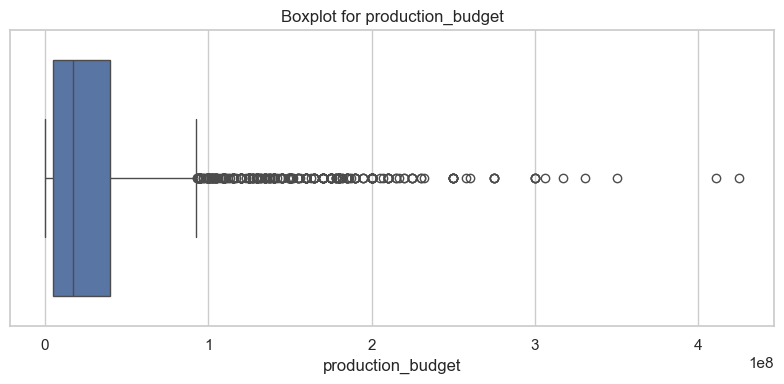

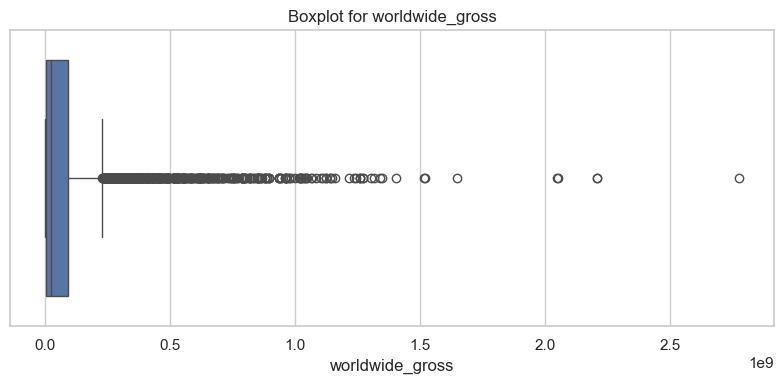

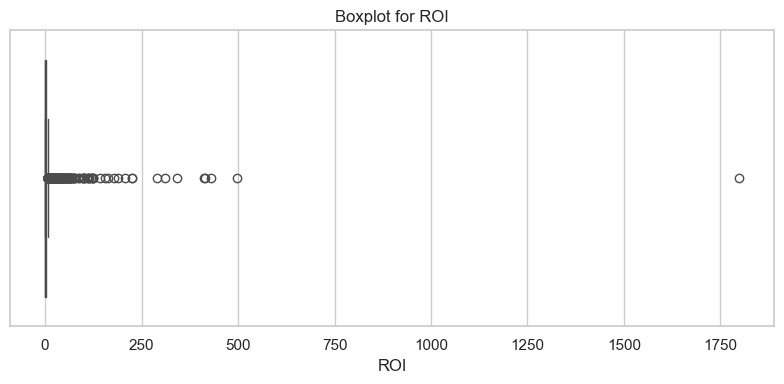

In [34]:
# Identify columns needed to detect outliers
needed_cols = [
    'production_budget',
    'worldwide_gross',
    'ROI'
]

# Set the overall style for better visuals
sns.set(style="whitegrid")

# Loop through each numerical column
for col in needed_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# 4. Exploratory Data Analysis(EDA)

#### Release Month Effect

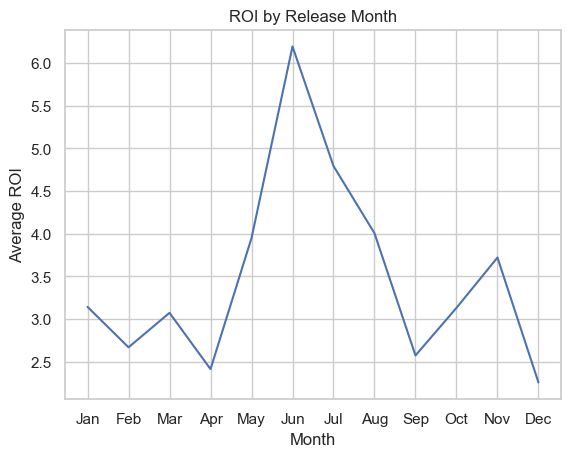

In [35]:
df = df.copy()
#  Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

#  Extract the month and store it in a new column 'release_month'
df['release_month'] = df['release_date'].dt.month

# Group by 'release_month' and calculate mean ROI
monthly_performance = df.groupby('release_month')['ROI'].mean()

# Plot
plt.plot(monthly_performance)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title("ROI by Release Month")
plt.xlabel("Month")
plt.ylabel("Average ROI")
plt.grid(True)
plt.show()

The ROI (Return on Investment) fluctuates throughout the year, suggesting that the performance of releases is influenced by the month they are launched.

The highest ROI occurs in June (6.25) and July (4.75), indicating these are the most favorable months for releases.

The lowest ROI is observed in April (2.4) and December (2.25), making these the least optimal months for releases.

#### Profitability by Genre

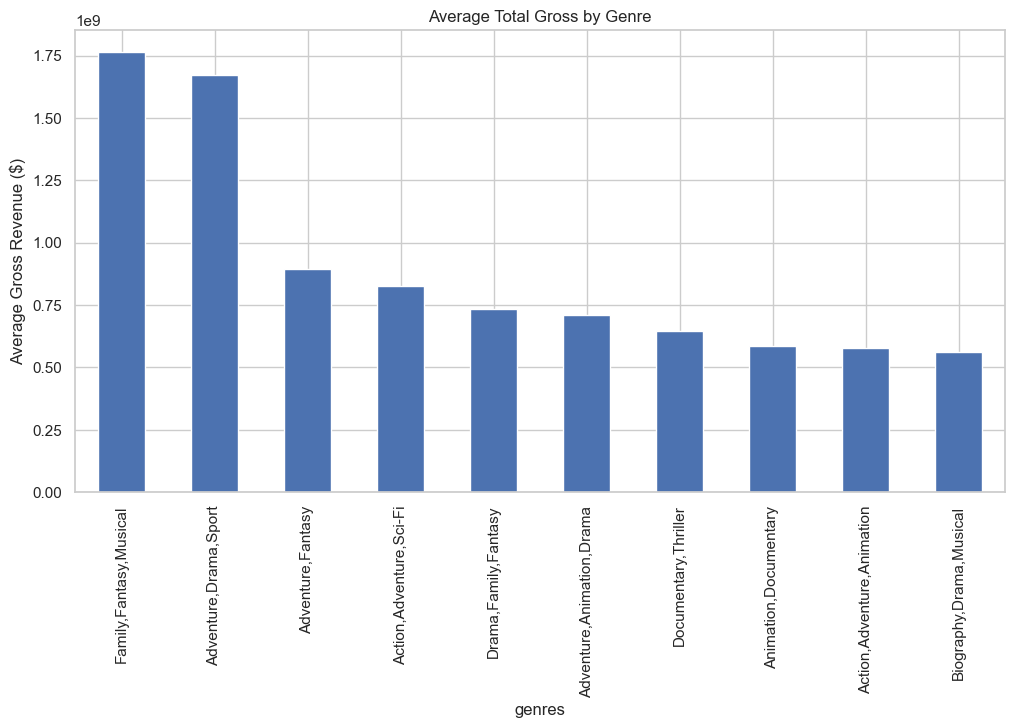

In [36]:
# Create a new column for total gross
df['domestic_gross'] = df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
df['total_gross'] = df['domestic_gross'] + df['worldwide_gross']

# Group by 'genres' and calculate mean total gross
genre_profitability = df.groupby('genres')['total_gross'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
genre_profitability.plot(kind='bar')
plt.title('Average Total Gross by Genre')
plt.ylabel('Average Gross Revenue ($)')
plt.show()

Family, Fantasy, Musical leads with $1.75M average gross—likely appeals to broad audiences.

Drama, Family, Fantasy also performs well ($1.70M), suggesting family-friendly combos with emotional hooks work.

#### Average ROI by Genre
Identify which genres are most profitable using Return on Investment (ROI)

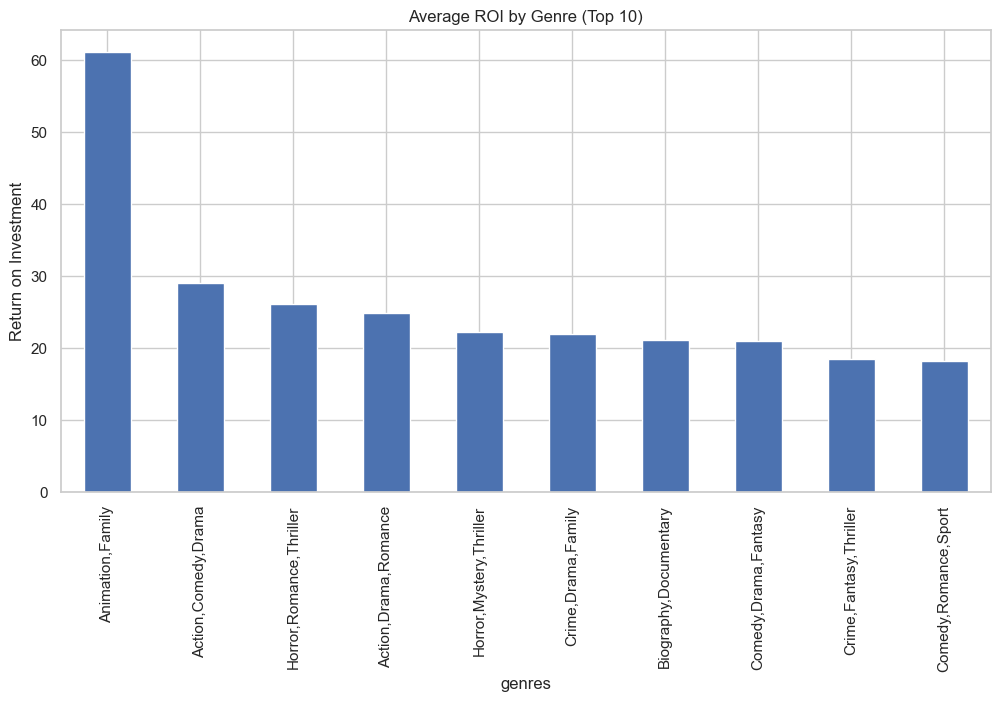

In [37]:
# Top genres by ROI
# Group by 'genres' and calculate mean ROI
genre_roi = df.groupby('genres')['ROI'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
genre_roi.head(10).plot(kind='bar')
plt.title('Average ROI by Genre (Top 10)')
plt.ylabel('Return on Investment')
plt.show()

Movies that combine (Animation, Family) and (Action, Comedy, and Drama) tend to perform really well. They offer a great mix of excitement, laughter, and emotional moments, making them appealing to a wide range of viewers.

Blending Horror or Thriller with genres like Mystery or Romance is also a winning formula. These films are usually inexpensive to produce but can deliver huge profits.

Biographies and Documentaries often struggle at the box office. Even if critics love them, their audience is usually smaller, so the returns aren’t great.

#### Average Worldwide Gross by Genre
Identify which genres bring in the highest box office revenue on average.

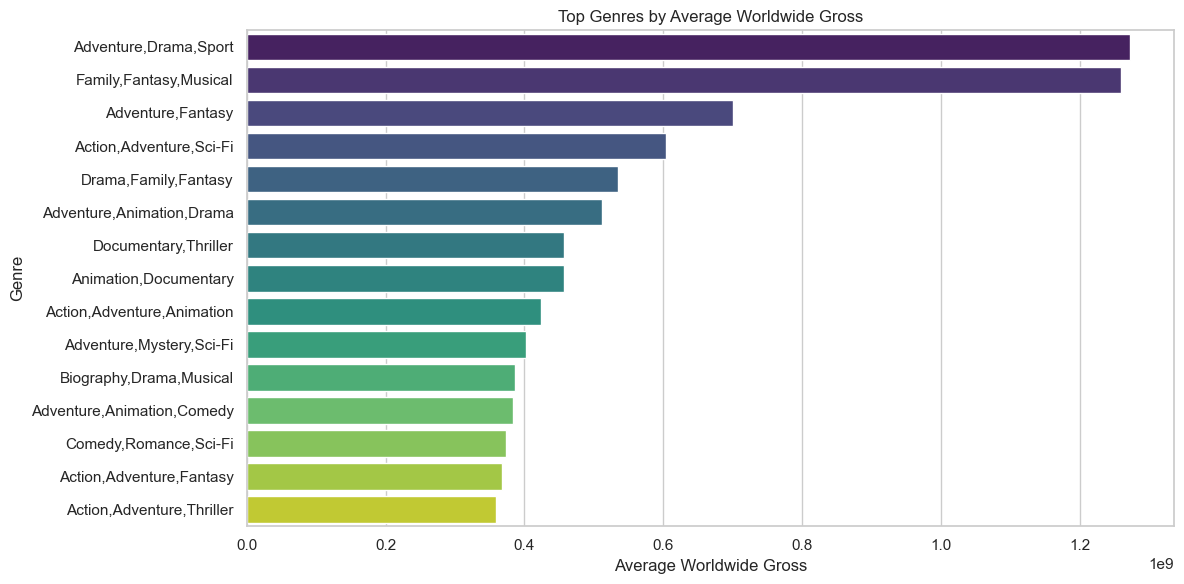

In [38]:
# Group by individual genre and compute average worldwide gross
genre_gross = df.groupby('genres')['worldwide_gross'].mean().sort_values(ascending=False)

# Plot the top 15 genres by average worldwide gross
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_gross.values[:15], y=genre_gross.index[:15], hue=genre_gross.index[:15], palette="viridis", legend=False) # assign y-axis as hue
plt.title('Top Genres by Average Worldwide Gross')
plt.xlabel('Average Worldwide Gross')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

The Family + Fantasy + Musical combo is the biggest box office winner—bringing in around $1.2 million on average. Think Disney or Pixar-style animated musicals that attract everyone from kids to grandparents.

Another strong trend is Adventure-based films, especially when combined with Drama, Sport, Fantasy or Sci-Fi—like superhero movies or epic fantasy adventures. These genres consistently bring in big numbers.

At the bottom of the list are Documentaries, even when paired with Thriller or Animation, they just don’t bring in much revenue.

Biography + Drama + Musical films also tend to underperform.

 ### Production Budget vs ROI
 See if big-budget films tend to be more or less profitable.

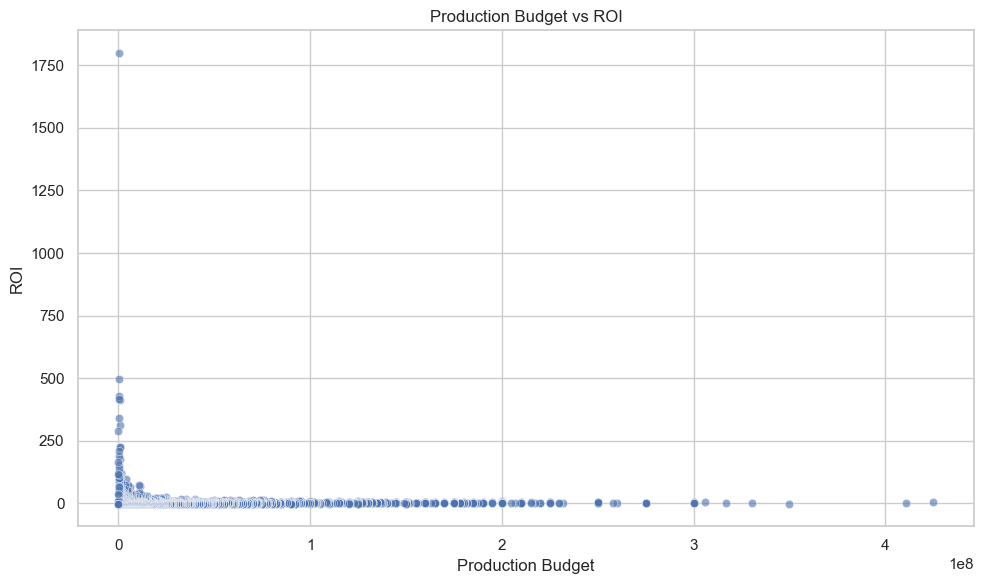

In [39]:
plt.figure(figsize=(10,6))

# Plot a scatter of budget vs ROI
sns.scatterplot(data=df, x='production_budget', y='ROI', alpha=0.6)

plt.title('Production Budget vs ROI')
plt.xlabel('Production Budget')
plt.ylabel('ROI')
plt.tight_layout()
plt.show()


Inverse relationship: As production budgets increase, ROI tends to decrease.

Low-budget films show a wider spread in ROI. Some generate extremely high returns.

High-budget films cluster around low ROI, meaning they usually don’t produce huge profit margins.

A few outliers with extremely high ROI appear among very low-budget films

### Average ROI by Budget Range
Discover which budget ranges yield the best average return.

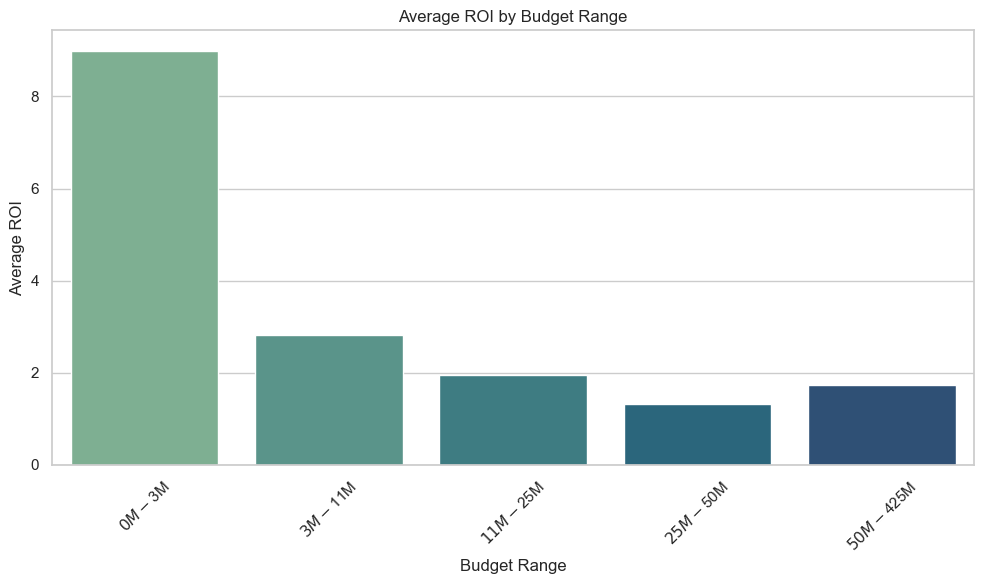

In [40]:
# Create a full copy of the DataFrame
df = df.copy()
# Create bins (use pd.cut if qcut fails)
df['budget_bin'] = pd.qcut(df['production_budget'], q=5, duplicates='drop')

# Group and calculate mean ROI
roi_by_bin = df.groupby('budget_bin', observed=False)['ROI'].mean()

# Format labels
labels = [f"${int(b.left/1e6)}M-${int(b.right/1e6)}M" for b in roi_by_bin.index]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=roi_by_bin.values, hue=labels, palette='crest', legend=False)
plt.title('Average ROI by Budget Range')
plt.xlabel('Budget Range')
plt.ylabel('Average ROI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Films with a budget between  0M to $ 3M have the highest average ROI, significantly outperforming all other budget categories.

This suggests these low-budget films often yield returns many times their investment.

 As the budget increases, the average ROI generally decreases.

### Average Worldwide Gross by Release Month
Examine which months have the highest gross releases

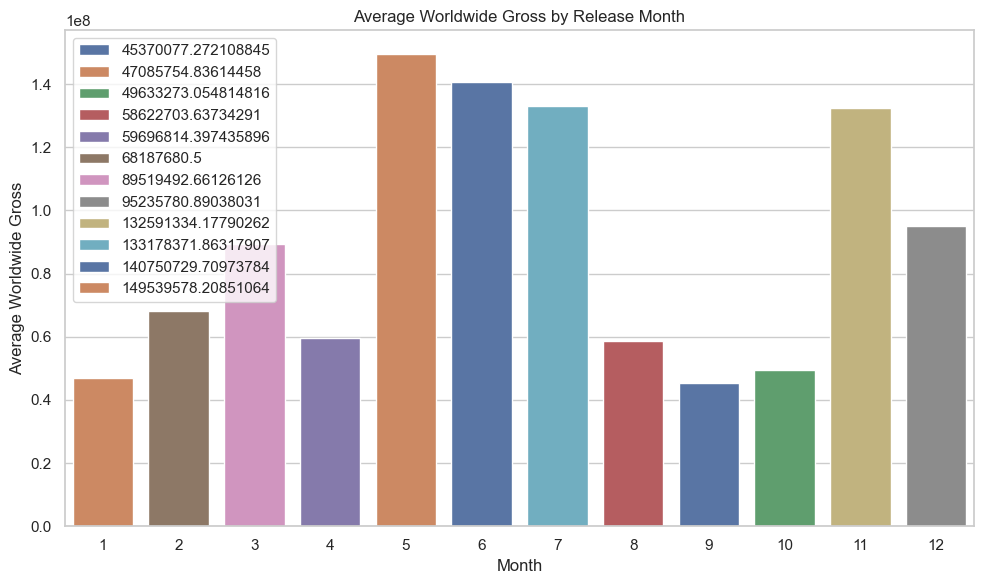

In [41]:
# Step 1: Extract release month
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_month'] = df['release_date'].dt.month

# Step 2: Group and calculate average worldwide gross
month_gross = df.groupby('release_month')['worldwide_gross'].mean()

# Step 3: Plot
plt.figure(figsize=(10,6))
sns.barplot(x=month_gross.index, y=month_gross.values, hue=month_gross.values, palette='deep')

plt.title('Average Worldwide Gross by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Worldwide Gross')
plt.tight_layout()
plt.show()

Movies tend to make more money as the year goes on. Early months like January and February have the lowest average earnings, while the biggest hits usually drop in May, June, July, November and December, with May peaking at about $149.5M.

There’s a strong rise in earnings in Summer (May–August). The holiday season especially from November to December also performs well.

### Average ROI by Season
See if the season of release affects profitability

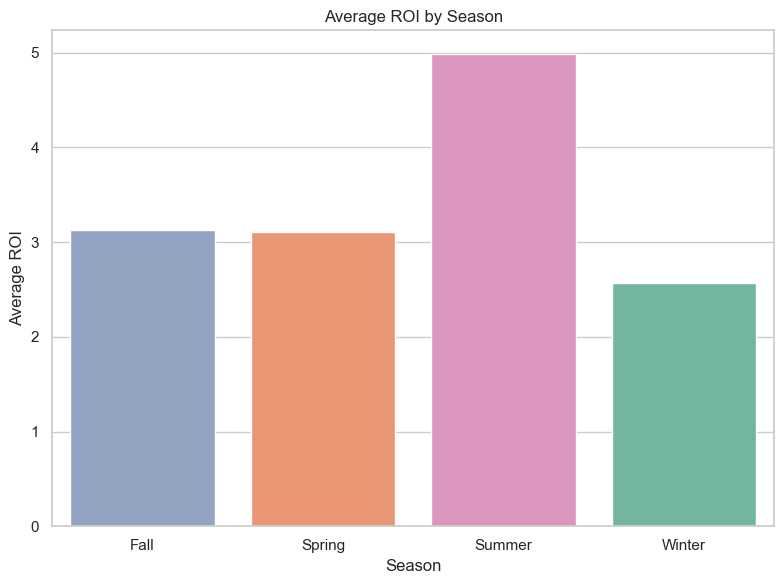

In [42]:
# Create season column
df['season'] = df['release_date'].dt.month % 12 // 3 + 1
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['season'] = df['season'].map(season_map)

# Group by season and compute average ROI
season_roi = df.groupby('season')['ROI'].mean()

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=season_roi.index, y=season_roi.values, hue=season_roi.values, palette='Set2', legend=False)

plt.title('Average ROI by Season')
plt.xlabel('Season')
plt.ylabel('Average ROI')
plt.tight_layout()
plt.show()

The summer (May-August) season is the most profitable for movie releases.

### Top Studios by Average Worldwide Gross
Identify which studios consistently make top earning films.

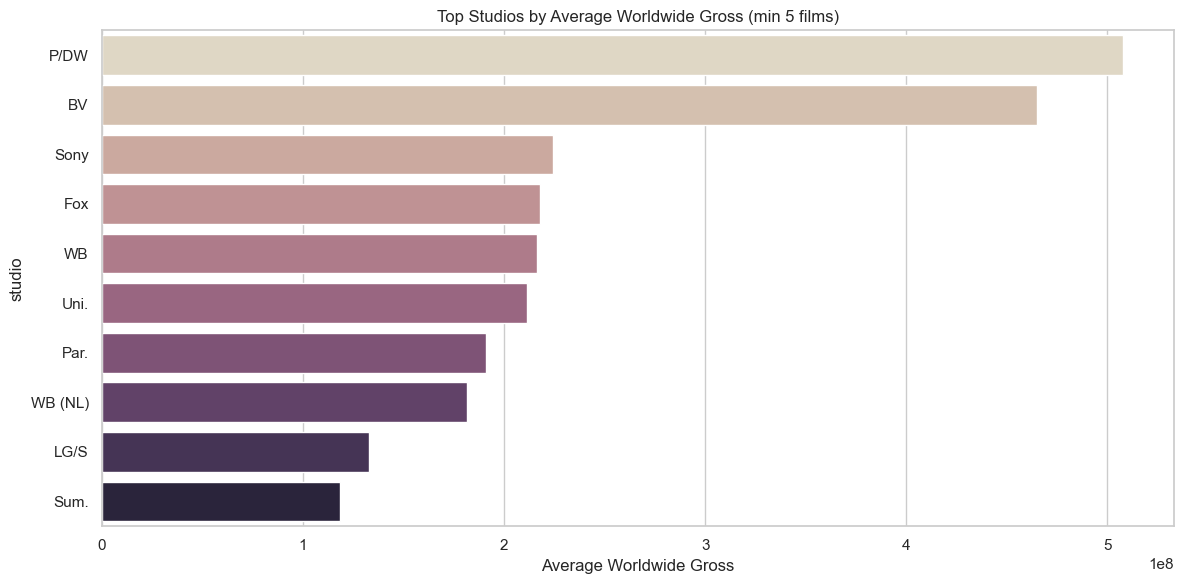

In [43]:
# Group and filter for studios with at least 5 movies
studio_stats = df.groupby('studio')['worldwide_gross'].agg(['mean', 'count'])
top_studios = studio_stats[studio_stats['count'] >= 5].sort_values(by='mean', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_studios['mean'], y=top_studios.index, hue=top_studios.index, palette='ch:s=-.2,r=.6', legend=False)

plt.title('Top Studios by Average Worldwide Gross (min 5 films)')
plt.xlabel('Average Worldwide Gross')
plt.tight_layout()
plt.show()

P/DW (Paramount/DreamWorks) has the highest average worldwide gross among studios, surpassing $500M per film on average.
It holds a clear lead over all other competitors.

BV (Buena Vista/Disney) is the second highest, averaging around $470M per film.

These two top studios are well ahead of the rest of the pack

### Correlation Heatmap — Ratings vs ROI
Check how strongly ratings relate to performance.

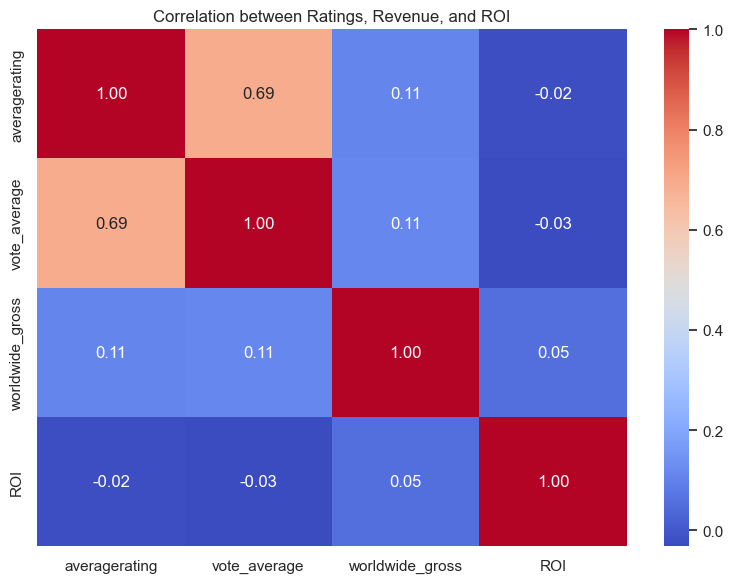

In [44]:
# Select relevant numeric columns
corr_cols = ['averagerating', 'vote_average', 'worldwide_gross', 'ROI']
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation between Ratings, Revenue, and ROI')
plt.tight_layout()
plt.show()

Averagerating and vote average have a high correlation (0.69). This means these two rating metrics generally agree, when one is high, the other tends to be high too.

Both averagerating and vote average have low correlation with worldwide gross (0.11). This suggests that higher ratings don’t necessarily mean higher revenue.

ROI has very weak to no correlation with any of the other variables. This shows that a movie’s profitability (ROI) is not strongly tied to its ratings or box office revenue.

### IMDB Rating vs Worldwide Gross
Explore if higher IMDB scores lead to better revenue

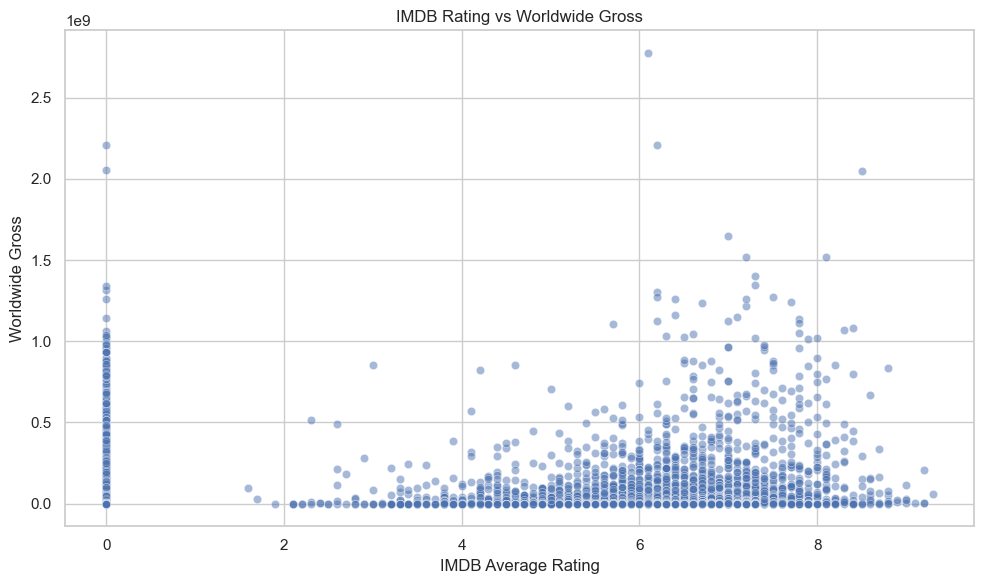

In [45]:
plt.figure(figsize=(10,6))

# Scatter plot of rating vs worldwide gross
sns.scatterplot(data=df, x='averagerating', y='worldwide_gross', alpha=0.5)

plt.title('IMDB Rating vs Worldwide Gross')
plt.xlabel('IMDB Average Rating')
plt.ylabel('Worldwide Gross')
plt.tight_layout()
plt.show()

Most movies cluster between IMDB ratings of 5 to 8 and gross under $500 million.

Very few high-grossing movies (above $1 billion), and they tend to have ratings between 6 and 8.

There’s a large vertical cluster at rating = 0, which represents invalid ratings.

This generally means that high ratings don’t guarantee high earnings. Some average rated movies still made huge money

### Exporting Data for Visualization

In [46]:
# Relevant columns for analysis and visualization
columns_to_export = ['title', 'genres', 'production_budget', 'worldwide_gross', 'ROI',
'release_date', 'vote_average', 'averagerating', 'studio']

df_to_export = df[columns_to_export]
# Export to Excel
df_to_export.to_excel('Box_Office_DataSet.xlsx', index=False)

# 5. Conclusion

Family + Fantasy + Musical and Adventure-based films are box office winners. Low-cost Horror/Thriller mixes can also deliver big returns.

Low-budget films ($0M–$3M) give the best ROI. Big-budget blockbusters can make huge gross but with smaller profit margins.

Summer (May–August) is the sweet spot for both revenue and ROI especially June and July.

Ratings don’t guarantee success — average-rated films often make the most money.

Paramount/DreamWorks and Disney lead the industry in global earnings.

# 6. Recommendations
1. Focus on Profitable, Audience-Favorite Genres – Family-friendly blockbusters, exciting adventures, and low-cost thrillers that deliver strong returns.

2. Balance Budgets Wisely – Mix smaller, high-profit projects with a few big-budget tentpole films to manage risk and reward.

3. Smart Release Timing – Launch major films in summer and holiday seasons (when audiences are most active) and save smaller, ROI-driven films for stronger months (avoiding January/February).

4. Audience & Marketing First – Prioritize crowd-pleasing stories and clever marketing over chasing critical acclaim.

5. Learn from the Best – Study successful global release strategies from top studios and explore smart partnerships when needed.